## First looks at the DataSet

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [3]:
df = pd.read_csv("data/charging_sessions.csv")

In [4]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   Unnamed: 0                        id             connectionTime  \
0           0  5e23b149f9af8b5fe4b973cf  2020-01-02 13:08:54+00:00   
1           1  5e23b149f9af8b5fe4b973d0  2020-01-02 13:36:50+00:00   
2           2  5e23b149f9af8b5fe4b973d1  2020-01-02 13:56:35+00:00   
3           3  5e23b149f9af8b5fe4b973d2  2020-01-02 13:59:58+00:00   
4           4  5e23b149f9af8b5fe4b973d3  2020-01-02 14:00:01+00:00   

              disconnectTime           doneChargingTime  kWhDelivered  \
0  2020-01-02 19:11:15+00:00  2020-01-02 17:31:35+00:00        25.016   
1  2020-01-02 22:38:21+00:00  2020-01-02 20:18:05+00:00        33.097   
2  2020-01-03 00:39:22+00:00  2020-01-02 16:35:06+00:00         6.521   
3  2020-01-02 16:38:39+00:00  2020-01-02 15:18:45+00:00         2.355   
4  2020-01-02 22:08:40+00:00  2020-01-02 18:17:30+00:00        13.375   

                                sessionID  siteID  spaceID    stationID  \
0  1_1_179_810_2020-01-02 13:08:53.870034       1 

In [5]:
print("\nShape of the dataset:")
print(df.shape)


Shape of the dataset:
(66450, 13)


In [6]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB
None


In [18]:
print("\nStatisitcal Summary:")
print(df.describe())


Statisitcal Summary:
         Unnamed: 0  kWhDelivered        siteID        userID
count  66450.000000  66450.000000  66450.000000  49187.000000
mean    4726.102062     11.787916      1.472656   1800.494582
std     3568.025394     10.314789      0.499256   2617.548614
min        0.000000      0.501000      1.000000      1.000000
25%     1845.000000      5.097000      1.000000    431.000000
50%     3960.000000      9.140000      1.000000    818.000000
75%     7027.000000     14.183000      2.000000   1805.000000
max    15291.000000    108.797242      2.000000  19923.000000


In [19]:
print("\nColumn names:")
print(df.columns)


Column names:
Index(['Unnamed: 0', 'id', 'connectionTime', 'disconnectTime',
       'doneChargingTime', 'kWhDelivered', 'sessionID', 'siteID', 'spaceID',
       'stationID', 'timezone', 'userID', 'userInputs'],
      dtype='object')


## Inspecting missing data

In [20]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Unnamed: 0              0
id                      0
connectionTime          0
disconnectTime          0
doneChargingTime     4088
kWhDelivered            0
sessionID               0
siteID                  0
spaceID                 0
stationID               0
timezone                0
userID              17263
userInputs          17263
dtype: int64


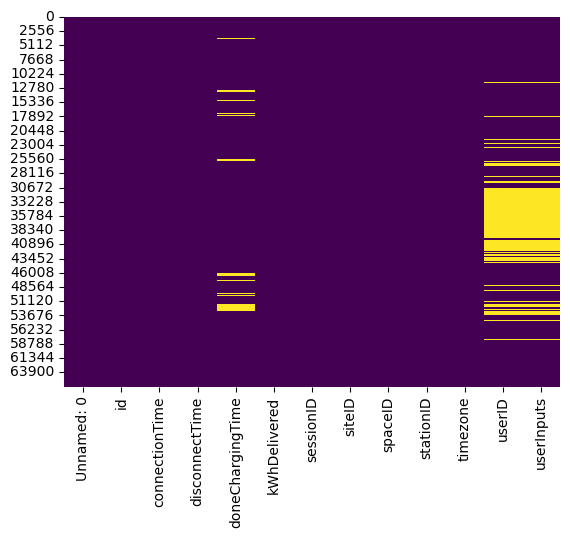

In [26]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

In [29]:
# Count of unique values for each column
print(df.nunique())

Unnamed: 0          15292
id                  65037
connectionTime      64839
disconnectTime      64906
doneChargingTime    60637
kWhDelivered        25629
sessionID           65037
siteID                  2
spaceID               107
stationID             107
timezone                1
userID               1006
userInputs          47822
dtype: int64


## Examine correlations for numerical data

In [31]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


              Unnamed: 0  kWhDelivered    siteID    userID
Unnamed: 0      1.000000     -0.069987  0.274109 -0.136843
kWhDelivered   -0.069987      1.000000 -0.232994  0.048960
siteID          0.274109     -0.232994  1.000000  0.032221
userID         -0.136843      0.048960  0.032221  1.000000


In [8]:
df[(df['doneChargingTime'].isnull()) & (df['userID'].isnull()) ]

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
3884,3884,5ebde28df9af8b709bfd524a,2020-04-28 14:15:03+00:00,2020-04-28 17:54:24+00:00,NaN,0.738,1_1_193_820_2020-04-28 14:16:02.714331,1,AG-1F04,1-1-193-820,America/Los_Angeles,NaN,NaN
13301,7728,5e040d3ff9af8b5c50054c08,2019-12-09 14:32:44+00:00,2019-12-09 16:14:51+00:00,NaN,0.723,1_1_178_824_2019-12-09 14:32:43.608397,1,AG-1F07,1-1-178-824,America/Los_Angeles,NaN,NaN
13307,7734,5e040d3ff9af8b5c50054c0e,2019-12-09 14:55:48+00:00,2019-12-10 01:11:48+00:00,NaN,1.341,1_1_179_781_2019-12-09 14:55:48.478805,1,AG-3F31,1-1-179-781,America/Los_Angeles,NaN,NaN
13308,7735,5e040d3ff9af8b5c50054c0f,2019-12-09 14:57:46+00:00,2019-12-09 19:08:01+00:00,NaN,1.021,1_1_193_816_2019-12-09 14:57:46.478885,1,AG-1F05,1-1-193-816,America/Los_Angeles,NaN,NaN
13316,7743,5e040d3ff9af8b5c50054c17,2019-12-09 15:13:03+00:00,2019-12-09 21:49:03+00:00,NaN,0.864,1_1_179_813_2019-12-09 15:13:02.712452,1,AG-3F15,1-1-179-813,America/Los_Angeles,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52831,1244,5c36631ef9af8b4639a8e594,2018-10-08 13:59:40+00:00,2018-10-08 23:44:24+00:00,NaN,6.808,1_1_194_818_2018-10-08 13:59:39.888889,1,AG-1F14,1-1-194-818,America/Los_Angeles,NaN,NaN
52851,1264,5c36631ef9af8b4639a8e5a8,2018-10-08 14:43:30+00:00,2018-10-08 22:28:42+00:00,NaN,4.105,1_1_191_782_2018-10-08 14:43:29.905671,1,AG-4F50,1-1-191-782,America/Los_Angeles,NaN,NaN
52863,1276,5c36631ef9af8b4639a8e5b4,2018-10-08 19:14:11+00:00,2018-10-08 23:45:54+00:00,NaN,17.391,1_1_191_802_2018-10-08 19:14:11.503418,1,AG-4F44,1-1-191-802,America/Los_Angeles,NaN,NaN
52867,1280,5c36631ef9af8b4639a8e5b8,2018-10-08 20:47:54+00:00,2018-10-08 22:38:26+00:00,NaN,4.238,1_1_179_801_2018-10-08 20:47:53.737009,1,AG-3F21,1-1-179-801,America/Los_Angeles,NaN,NaN
